<a href="https://colab.research.google.com/github/0017YUAN/Intro-ds/blob/main/Another_copy_of_Group_3_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Data/

ls: cannot access '/content/drive/MyDrive/Data/': No such file or directory


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Indtro-DS/Spring2025-introDS/Student-submissions/Data/')
!pwd;ls Group3/

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Spring2025-introDS/Student-submissions/Data/'

### **Prep** (Import Libraries and Parsing Dates)

In [ ]:
from datetime import datetime, timedelta
from PIL import Image
import numpy as np
from collections import defaultdict, OrderedDict
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Function to convert data strings to datetime objects
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, "%b %Y")
    except ValueError:
        print(f"Could not parse date string: {date_str}")
        return None

### **Group 3**

In [ ]:
filelist = glob.glob('Group3/*')
filelist

['Group3/April 1855 Black.PNG',
 'Group3/April 1855 Blue.PNG',
 'Group3/February 1856 Black.PNG',
 'Group3/January 1856 Black.PNG',
 'Group3/June 1855 Black.PNG',
 'Group3/June 1855 Blue.PNG',
 'Group3/June 1855 Red.PNG',
 'Group3/March 1856 Blue.PNG',
 'Group3/May 1855 Black.PNG',
 'Group3/May 1855 Blue.PNG',
 'Group3/May 1855 Red.PNG',
 'Group3/August 1855 Blue.PNG',
 'Group3/December 1885 Black .PNG',
 'Group3/August 1885 Red.PNG',
 'Group3/December 1885 Blue.PNG',
 'Group3/September 1885 Red.PNG',
 'Group3/October 1885 Red.PNG',
 'Group3/November 1885 Red.PNG',
 'Group3/November 1885 Blue.PNG',
 'Group3/September 1855 Blue.PNG',
 'Group3/December 1885 Red.PNG',
 'Group3/October 1885 Blue.PNG',
 'Group3/July 1885 Red.PNG',
 'Group3/July 1855 Blue.PNG',
 'Group3/September 1885 Black.PNG',
 'Group3/October 1885 Black.PNG',
 'Group3/November 1885 Black.PNG',
 'Group3/February 1855 Blue.PNG',
 'Group3/February 1855 Black.PNG',
 'Group3/February 1855 Red.PNG',
 'Group3/January 1855 Blue.

In [ ]:
!touch file

In [ ]:
png_files = [f for f in filelist if f.endswith('.png')] + [f for f in filelist if f.endswith('.PNG')]
len(png_files)

72

In [ ]:
import re
print(re.search(r'(\s\w+\s)', "234-. udT33-4546"))

None


In [ ]:
bool([None])

True

In [ ]:
unformatted_data_3 = []
data_dict_3 = defaultdict(list)

group_3_data = {'date': [], 'wound': [], 'disease': [], 'other': []}

for img_path in png_files:
  png_name = img_path.split('/')[-1].replace('1885', '1855') #Convert any file from the year 1885 to 1855
  match = re.search(r'(\w+\s\d{4})\s(\w+)', png_name)
  if match:
    time, field_name = match.groups()
    mon_year = datetime.strptime(time, "%B %Y").strftime("%b %Y")
  else:
    print(f"No match found for {png_name}")
    continue

  # Open the image and convert it to a numpy array
  img = Image.open(img_path)
  img_rgb = np.array(img)
  # Count transparent pixels
  if img_rgb.shape[2] == 4:
       alpha_channel = img_rgb[:, :, 3]
       pixel_count = np.sum(alpha_channel == 0)
  else:
       print(f"Warning: Image {img_path} does not have an alpha channel.") # For blank images
       pixel_count = 0

  # data_dict_3[mon_year].append((field_name, pixel_count))
  unformatted_data_3.append((mon_year, field_name, pixel_count))

# Sorting the data by date
sorted_data_3 = sorted(unformatted_data_3, key=lambda x: parse_date(x[0]))

for entry in sorted_data_3:
    data_dict_3[entry[0]].append((entry[1], entry[2]))

for month_y, list_of_pair in data_dict_3.items():
  group_3_data['date'].append(month_y)
  temp_dict = dict(list_of_pair)
  group_3_data['disease'].append(temp_dict.get('Blue', 0))
  group_3_data['other'].append(temp_dict.get('Black', 0))
  group_3_data['wound'].append(temp_dict.get('Red', 0))

print(len(group_3_data['date']))
print(len(group_3_data['disease']))
print(len(group_3_data['wound']))
print(len(group_3_data['other']))

print(group_3_data)

24
24
24
24
{'date': ['Apr 1854', 'May 1854', 'Jun 1854', 'Jul 1854', 'Aug 1854', 'Sep 1854', 'Oct 1854', 'Nov 1854', 'Dec 1854', 'Jan 1855', 'Feb 1855', 'Mar 1855', 'Apr 1855', 'May 1855', 'Jun 1855', 'Jul 1855', 'Aug 1855', 'Sep 1855', 'Oct 1855', 'Nov 1855', 'Dec 1855', 'Jan 1856', 'Feb 1856', 'Mar 1856'], 'wound': [0, 0, 0, 0, 0, 1627, 3746, 8205, 3519, 2122, 1167, 922, 0, 209, 2956, 1618, 2405, 1924, 333, 379, 76, 0, 0, 0], 'disease': [0, 220, 271, 10196, 22664, 19796, 10452, 18591, 44386, 77264, 48160, 31542, 9700, 9379, 11106, 5225, 6849, 3075, 2240, 3426, 1526, 0, 0, 76], 'other': [534, 380, 64, 848, 991, 539, 0, 0, 788, 6213, 8338, 4250, 651, 408, 306, 746, 510, 395, 413, 334, 562, 455, 137, 129]}


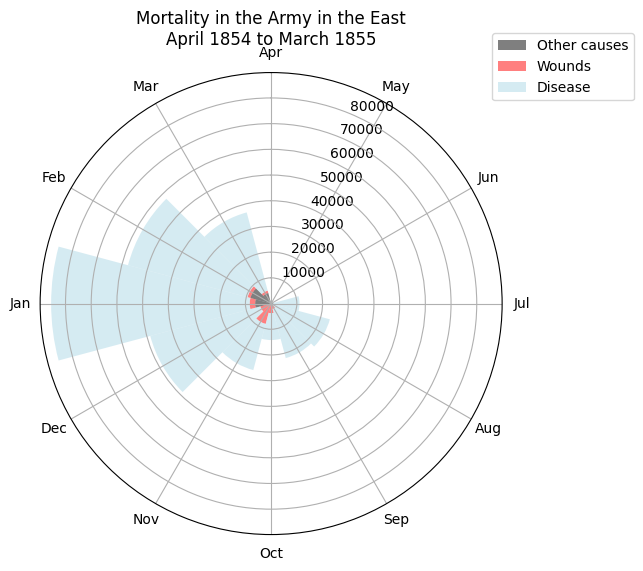

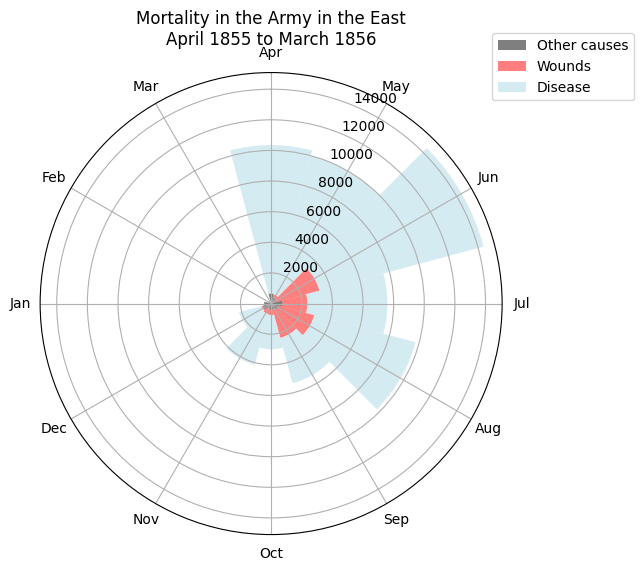

In [ ]:
def create_nightingale_rose(data, title):
    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Set up the plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='polar')

    # Calculate angles for each month (in radians)
    n_months = len(df)
    angles = np.linspace(0, 2*np.pi, n_months, endpoint=False)

    # Plot each cause of death
    width = 2*np.pi / n_months

    # Plot in reverse order so disease (largest) is on top
    ax.bar(angles, df['other'], width=width, bottom=0.0, color='black', alpha=0.5, label='Other causes')
    ax.bar(angles, df['wound'], width=width, bottom=df['other'], color='red', alpha=0.5, label='Wounds')
    ax.bar(angles, df['disease'], width=width, bottom=df['other'] + df['wound'], color='lightblue', alpha=0.5, label='Disease')

    # Customize the plot
    ax.set_theta_direction(-1)  # Clockwise
    ax.set_theta_zero_location('N')  # Start from top

    # Set month labels
    month_labels = [date.split(' ')[0][:3] for date in df['date']]
    ax.set_xticks(angles)
    ax.set_xticklabels(month_labels)

    # Add title and legend
    plt.title(title, pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    return fig

# Create two separate plots for the two time periods
first_year = {key: value[:12] for key, value in group_3_data.items()}
second_year = {key: value[12:] for key, value in group_3_data.items()}

# Generate plots
fig1 = create_nightingale_rose(first_year, 'Mortality in the Army in the East\nApril 1854 to March 1855')
fig2 = create_nightingale_rose(second_year, 'Mortality in the Army in the East\nApril 1855 to March 1856')

plt.show()

### **Group 2**

In [ ]:
filelist = glob.glob('Group2/*')
filelist

['Group2/Untitled document.gdoc',
 'Group2/Jan Black.PNG',
 'Group2/Nov Blue.PNG',
 'Group2/Nov Red.PNG',
 'Group2/Oct Black.PNG',
 'Group2/Oct Blue.PNG',
 'Group2/Oct Red.PNG',
 'Group2/grey185503.PNG',
 'Group2/grey185502.PNG',
 'Group2/grey185501.PNG',
 'Group2/grey185412.PNG',
 'Group2/red185503.PNG',
 'Group2/red185502.PNG',
 'Group2/red185501.PNG',
 'Group2/red185412.PNG',
 'Group2/red185411.PNG',
 'Group2/red185410.PNG',
 'Group2/blue185503.PNG',
 'Group2/blue185502.PNG',
 'Group2/blue185501.PNG',
 'Group2/blue185412.PNG',
 'Group2/blue185411.PNG',
 'Group2/blue185410.PNG',
 'Group2/Nov Black.PNG',
 'Group2/Dec Black.PNG',
 'Group2/Dec Blue.PNG',
 'Group2/Dec Red.PNG',
 'Group2/Feb Black.PNG',
 'Group2/1855-9-Black.PNG',
 'Group2/1855-8-Red.PNG',
 'Group2/1855-9-Red.PNG',
 'Group2/1855-9-Blue.PNG',
 'Group2/1855-8-Blue.PNG',
 'Group2/1855-8-Black.PNG',
 'Group2/1855-7-Red.PNG',
 'Group2/1855-7-Blue.PNG',
 'Group2/1855-7-Black.PNG',
 'Group2/1855-6-Red.PNG',
 'Group2/1855-6-Blue.

In [ ]:
png_files = [f for f in filelist if f.endswith('.png')] + [f for f in filelist if f.endswith('.PNG')]
len(png_files)

57

In [ ]:
unformatted_data_2 = []
data_dict_2 = defaultdict(list)

group_2_data = {'date': [], 'wound': [], 'disease': [], 'other': []}

for img_path in png_files:
    png_name = img_path.split('/')[-1].lower().replace('grey', 'black').replace('1884', '1854')

    match = re.search(r'(\d{4}-\d+)-(\w+)', png_name)  # '1855-9-Black'
    if match:
        time, field_name = match.groups()
        mon_year = datetime.strptime(time, "%Y-%m").strftime("%b %Y")

    elif re.search(r'(\w+)(\d{4})(\d{2})', png_name):  # 'red185411'
        field_name, year, month = re.search(r'(\w+)(\d{4})(\d{2})', png_name).groups()
        mon_year = datetime.strptime(f"{year} {month}", "%Y %m").strftime("%b %Y")

    elif re.search(r'(\w+)\s(\w+)', png_name):  # 'Marchch Black'
        time, field_name = re.search(r'(\w+)\s(\w+)', png_name).groups()
        try:
            month = datetime.strptime(time[:3], "%b") #Slicing is cleaner.
            month_str = month.strftime("%b")
            year = 1855 if month.month > 6 else 1856
            mon_year = datetime.strptime(f"{month_str}-{year}", '%b-%Y').strftime("%b %Y")
        except ValueError:
            print(f"Invalid month format in {png_name}")
            continue

    elif re.search(r'(\w+)(\d{4}-\w{3})', png_name):  # 'blue1854-aug'
        field_name, time = re.search(r'(\w+)(\d{4}-\w{3})', png_name).groups()
        mon_year = datetime.strptime(time, "%Y-%b").strftime("%b %Y")

    else:
        print(f"No match found for {png_name}")
        continue

    # Open the image and convert it to a numpy array
    img = Image.open(img_path)
    img_rgb = np.array(img)
    # Count transparent pixels
    if img_rgb.shape[2] == 4:
         alpha_channel = img_rgb[:, :, 3]
         pixel_count = np.sum(alpha_channel == 0)
    else:
         print(f"Warning: Image {img_path} does not have an alpha channel.")
         pixel_count = 0

    # data_dict_2[mon_year].append((field_name, pixel_count))
    unformatted_data_2.append((mon_year, field_name, pixel_count))

# Sorting the data by date
sorted_data_2 = sorted(unformatted_data_2, key=lambda date: parse_date(date[0]))

for entry in sorted_data_2:
  data_dict_2[entry[0]].append((entry[1], entry[2]))

for month_y, list_of_pair in data_dict_2.items():
  group_2_data['date'].append(month_y)
  temp_dict = dict(list_of_pair)
  group_2_data['disease'].append(temp_dict.get('blue', 0))
  group_2_data['other'].append(temp_dict.get('black', 0))
  group_2_data['wound'].append(temp_dict.get('red', 0))

print(len(group_2_data['disease']))
print(len(group_2_data['wound']))
print(len(group_2_data['other']))
print(len(group_2_data['date']))

print(group_2_data)

24
24
24
24
{'date': ['Apr 1854', 'May 1854', 'Jun 1854', 'Jul 1854', 'Aug 1854', 'Sep 1854', 'Oct 1854', 'Nov 1854', 'Dec 1854', 'Jan 1855', 'Feb 1855', 'Mar 1855', 'Apr 1855', 'May 1855', 'Jun 1855', 'Jul 1855', 'Aug 1855', 'Sep 1855', 'Oct 1855', 'Nov 1855', 'Dec 1855', 'Jan 1856', 'Feb 1856', 'Mar 1856'], 'wound': [0, 0, 0, 0, 0, 10, 3481, 7648, 3148, 1943, 974, 752, 0, 55, 768, 296, 439, 339, 8462, 7062, 571, 0, 0, 0], 'disease': [322, 4, 0, 156, 2629, 0, 9891, 17875, 43719, 76494, 47470, 30756, 2513, 2440, 2812, 990, 1253, 538, 53228, 85114, 35769, 0, 0, 8207], 'other': [0, 5, 1, 1, 4, 0, 0, 0, 668, 5888, 8250, 3910, 219, 122, 113, 86, 72, 37, 8968, 5334, 14410, 19398, 7259, 7870]}


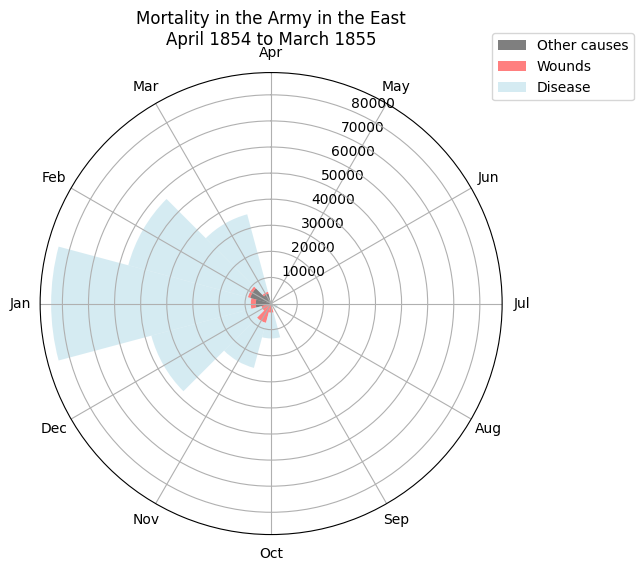

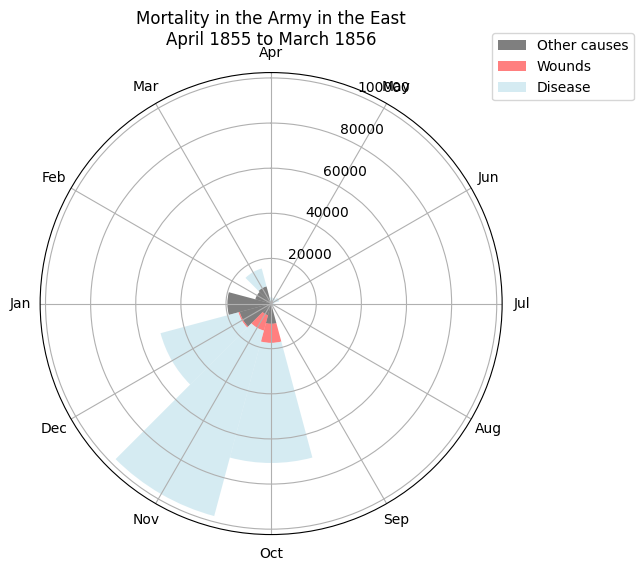

In [ ]:
def create_nightingale_rose(data, title):
    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Set up the plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='polar')

    # Calculate angles for each month (in radians)
    n_months = len(df)
    angles = np.linspace(0, 2*np.pi, n_months, endpoint=False)

    # Plot each cause of death
    width = 2*np.pi / n_months

    # Plot in reverse order so disease (largest) is on top
    ax.bar(angles, df['other'], width=width, bottom=0.0, color='black', alpha=0.5, label='Other causes')
    ax.bar(angles, df['wound'], width=width, bottom=df['other'], color='red', alpha=0.5, label='Wounds')
    ax.bar(angles, df['disease'], width=width, bottom=df['other'] + df['wound'], color='lightblue', alpha=0.5, label='Disease')

    # Customize the plot
    ax.set_theta_direction(-1)  # Clockwise
    ax.set_theta_zero_location('N')  # Start from top

    # Set month labels
    month_labels = [date.split(' ')[0][:3] for date in df['date']]
    ax.set_xticks(angles)
    ax.set_xticklabels(month_labels)

    # Add title and legend
    plt.title(title, pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    return fig

# Create two separate plots for the two time periods
first_year = {key: value[:12] for key, value in group_2_data.items()}
second_year = {key: value[12:] for key, value in group_2_data.items()}

# Generate plots
fig1 = create_nightingale_rose(first_year, 'Mortality in the Army in the East\nApril 1854 to March 1855')
fig2 = create_nightingale_rose(second_year, 'Mortality in the Army in the East\nApril 1855 to March 1856')

plt.show()

### **Group 1**

In [ ]:
filelist = glob.glob('Group1/*')
filelist

['Group1/1854-07_disease.png',
 'Group1/1854-07_other.png',
 'Group1/1854-08_disease.png',
 'Group1/1854-08_other.png',
 'Group1/1854-09_disease.png',
 'Group1/1854-09_other.png',
 'Group1/1854-09_wound.png',
 'Group1/1854-04_other.png',
 'Group1/1854-05_other.png',
 'Group1/1854-05_disease.png',
 'Group1/1854-06_disease.png',
 'Group1/1854-06_other.png',
 'Group1/1855-10_disease.png',
 'Group1/1855-10_wound.png',
 'Group1/1855-10_other.png',
 'Group1/1855-11_disease.png',
 'Group1/1855-11_other.png',
 'Group1/1855-11_wound.png',
 'Group1/1855-12_disease.png',
 'Group1/1855-12_other.png',
 'Group1/1855-12_wound.png',
 'Group1/1854-10_wound.png',
 'Group1/1854-10_disease.png',
 'Group1/1854-11_wound.png',
 'Group1/1854-11_disease.png',
 'Group1/1854-12_wound.png',
 'Group1/1854-12_disease.png',
 'Group1/1855-01_wound.png',
 'Group1/1855-01_disease.png',
 'Group1/1855-02_wound.png',
 'Group1/1855-02_disease.png',
 'Group1/1855-03_wound.png',
 'Group1/1855-03_disease.png',
 'Group1/1855-0

In [ ]:
png_files = [f for f in filelist if f.endswith('.png')] + [f for f in filelist if f.endswith('.PNG')]
len(png_files)

58

In [ ]:
unformatted_data = []
data_dict = defaultdict(list)

group_1_data = {'date': [], 'wound': [], 'disease': [], 'other': []}

for img_path in png_files:
  png_name = img_path.split('/')[-1]
  match = re.search(r'(\d{4}-\d{2})_(.*).png', png_name)
  if match:
    time, field_name = match.groups()
    mon_year = datetime.strptime(time, "%Y-%m").strftime("%b %Y")
  else:
    print(f"No match found for {png_name}")
    continue

  # Open the image and convert it to a numpy array
  img = Image.open(img_path)
  img_rgb = np.array(img)

  def before_1855_10 (date_str, threshold_date_str="1855-10"):
      date_obj = datetime.strptime(date_str, "%b %Y")
      threshold_date_obj = datetime.strptime(threshold_date_str, "%Y-%m")
      return date_obj < threshold_date_obj

  # Count transparent pixels
  if img_rgb.shape[2] == 4:
     alpha_channel = img_rgb[:, :, 3]
     if not before_1855_10 (mon_year):
       pixel_count = np.sum(alpha_channel != 0)
     else:
       pixel_count = np.sum(alpha_channel == 0)
  else:
     print(f"Warning: Image {img_path} does not have an alpha channel.")
     pixel_count = 0

  # data_dict[mon_year].append((field_name, pixel_count))
  unformatted_data.append((mon_year, field_name, pixel_count))

# Sorting the data by date
sorted_data = sorted(unformatted_data, key=lambda date: parse_date(date[0]))

for entry in sorted_data:
  data_dict[entry[0]].append((entry[1], entry[2]))

for month_y, list_of_pair in data_dict.items():
  group_1_data['date'].append(month_y)
  temp_dict = dict(list_of_pair)
  group_1_data['disease'].append(temp_dict.get('disease', 0))
  group_1_data['other'].append(temp_dict.get('other', 0))
  group_1_data['wound'].append(temp_dict.get('wound', 0))

print(len(group_1_data['disease']))
print(len(group_1_data['wound']))
print(len(group_1_data['other']))
print(len(group_1_data['date']))

print(group_1_data)

24
24
24
24
{'date': ['Apr 1854', 'May 1854', 'Jun 1854', 'Jul 1854', 'Aug 1854', 'Sep 1854', 'Oct 1854', 'Nov 1854', 'Dec 1854', 'Jan 1855', 'Feb 1855', 'Mar 1855', 'Apr 1855', 'May 1855', 'Jun 1855', 'Jul 1855', 'Aug 1855', 'Sep 1855', 'Oct 1855', 'Nov 1855', 'Dec 1855', 'Jan 1856', 'Feb 1856', 'Mar 1856'], 'wound': [0, 0, 0, 0, 0, 1429, 3107, 6683, 2904, 1531, 1172, 820, 0, 437, 3613, 1447, 2220, 1777, 19840, 28215, 3162, 0, 0, 0], 'disease': [0, 173, 222, 10008, 22541, 19759, 9318, 17282, 41078, 75447, 45638, 29622, 437, 10846, 12487, 4830, 6414, 2714, 44720, 75537, 18432, 0, 0, 20687], 'other': [447, 264, 40, 711, 887, 500, 0, 0, 534, 5299, 7260, 3733, 437, 802, 732, 637, 469, 374, 24716, 42000, 12480, 26208, 16577, 20687]}


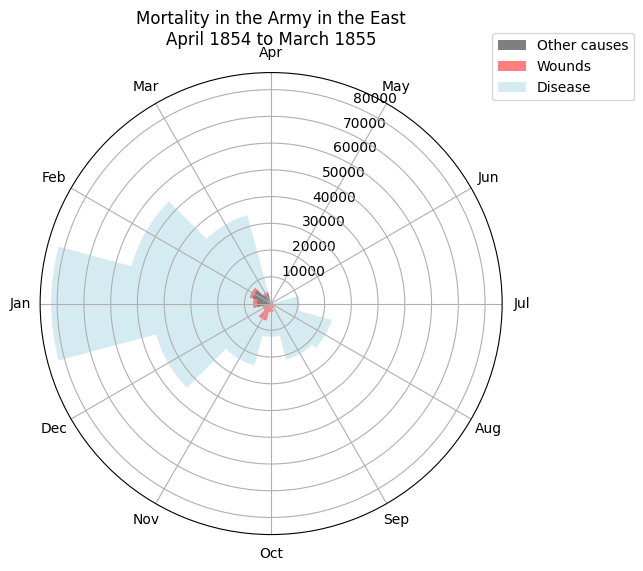

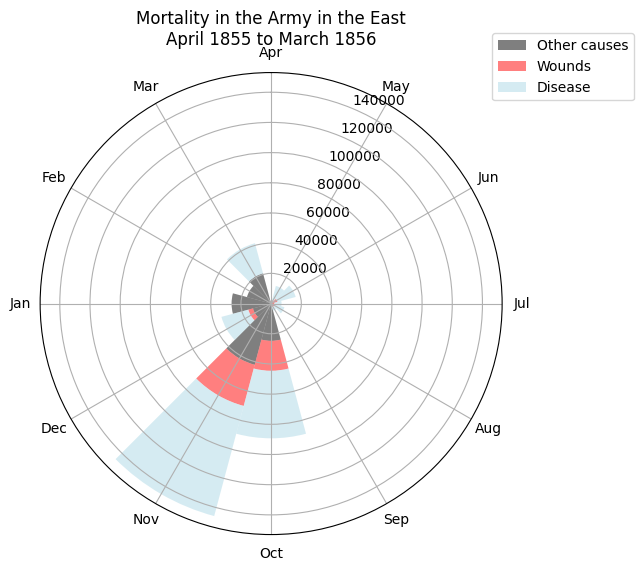

In [ ]:
def create_nightingale_rose(data, title):
    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Set up the plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='polar')

    # Calculate angles for each month (in radians)
    n_months = len(df)
    angles = np.linspace(0, 2*np.pi, n_months, endpoint=False)

    # Plot each cause of death
    width = 2*np.pi / n_months

    # Plot in reverse order so disease (largest) is on top
    ax.bar(angles, df['other'], width=width, bottom=0.0, color='black', alpha=0.5, label='Other causes')
    ax.bar(angles, df['wound'], width=width, bottom=df['other'], color='red', alpha=0.5, label='Wounds')
    ax.bar(angles, df['disease'], width=width, bottom=df['other'] + df['wound'], color='lightblue', alpha=0.5, label='Disease')

    # Customize the plot
    ax.set_theta_direction(-1)  # Clockwise
    ax.set_theta_zero_location('N')  # Start from top

    # Set month labels
    month_labels = [date.split(' ')[0][:3] for date in df['date']]
    ax.set_xticks(angles)
    ax.set_xticklabels(month_labels)

    # Add title and legend
    plt.title(title, pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    return fig

# Create two separate plots for the two time periods
first_year = {key: value[:12] for key, value in group_1_data.items()}
second_year = {key: value[12:] for key, value in group_1_data.items()}

# Generate plots
fig1 = create_nightingale_rose(first_year, 'Mortality in the Army in the East\nApril 1854 to March 1855')
fig2 = create_nightingale_rose(second_year, 'Mortality in the Army in the East\nApril 1855 to March 1856')

plt.show()